<a href="https://colab.research.google.com/github/MernaSameh7482/Churn-prediction/blob/main/Spam_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Bidirectional, BatchNormalization, Conv1D, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
import re

In [2]:
#Main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Import required libraries
import matplotlib.pyplot as plt  #import matplotlib for visualization
import numpy as np #imports a fast numerical programming library
import pandas as pd #imports panda for easy data analysis and manipulation
from sklearn.model_selection import train_test_split #import train_test_split function from model_selction module
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics #imports metrics model to check for accuracy
from sklearn.ensemble import RandomForestClassifier

In [3]:
#df = pd.read_csv('/content/spam (1).csv',encoding = "ISO-8859-1")
df = pd.read_csv('/content/spam.csv',encoding = "ISO-8859-1")

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# prompt: delete columns Unnamed: 2	,Unnamed: 3	,Unnamed: 4

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.shape

(5572, 2)

In [10]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
!pip install emoji
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r"[^\w\s]", "", text) # remove punctuation
    text = re.sub(r"\s+", " ", text) # remove extra spaces
    text = text.replace("dont", "do not") # expand contraction
    text = text.replace("youre", "you are") # expand contraction
    text = re.sub(r'http\S+', r'<URL>', text)
    text = emoji.demojize(text)

# This is a text with emoji


    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in tokens]


    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in stems]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(lem)
    return preprocessed_text

In [15]:
df['v2'] = df['v2'].apply(preprocess_text)

In [16]:
df['v2'] = df['v2'].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 3]))

In [17]:
df

,v1,v2
0,ham,jurong point crazi avail bugi great world buff...
1,ham,joke
2,spam,free entri wkli comp final text receiv entri q...
3,ham,earli alreadi
4,ham,think live around though
...,...,...
5567,spam,time contact pound prize claim easi call minut...
5568,ham,esplanad home
5569,ham,piti mood suggest
5570,ham,bitch like interest someth next week gave free


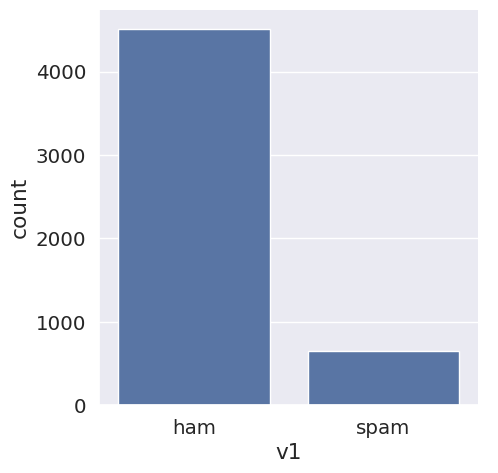

In [18]:
sns.catplot(x="v1",data=df,kind='count')

In [19]:
corpus = []
for i in df.v2:
    for j in i.split():
        if len(j.strip()) > 3:  # Check if the word has more 3 characters
            corpus.append(j.strip())


In [20]:
import collections
counter = collections.Counter(corpus)
common_words = counter.most_common(30)
dict(common_words)

{'call': 581,
 'come': 282,
 'know': 255,
 'free': 253,
 'like': 248,
 'time': 243,
 'want': 241,
 'love': 235,
 'good': 228,
 'text': 215,
 'need': 185,
 'send': 184,
 'take': 164,
 'today': 162,
 'think': 161,
 'home': 158,
 'stop': 156,
 'still': 150,
 'tell': 148,
 'back': 147,
 'repli': 146,
 'make': 141,
 'mobil': 134,
 'hope': 130,
 'plea': 128,
 'phone': 126,
 'sorri': 125,
 'week': 123,
 'work': 121,
 'meet': 119}

In [21]:
len(counter)

5222

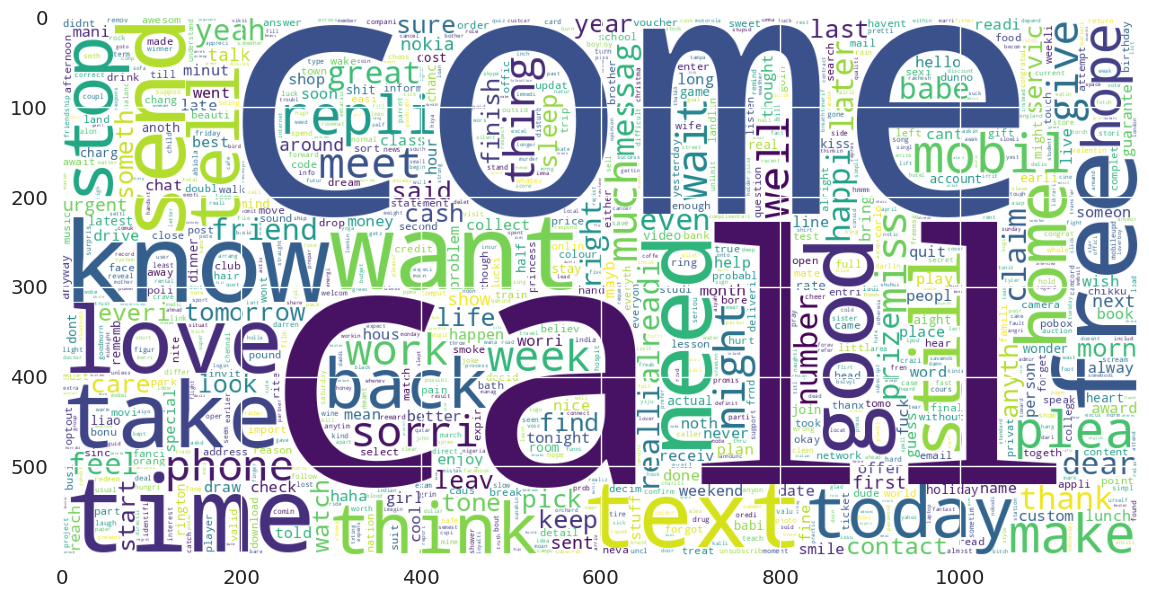

In [22]:
from wordcloud import WordCloud
text = " ".join(i for i in df.v2)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)

In [23]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['v1']=label_encoder.fit_transform(df['v1'])

In [24]:
df

,v1,v2
0,0,jurong point crazi avail bugi great world buff...
1,0,joke
2,1,free entri wkli comp final text receiv entri q...
3,0,earli alreadi
4,0,think live around though
...,...,...
5567,1,time contact pound prize claim easi call minut...
5568,0,esplanad home
5569,0,piti mood suggest
5570,0,bitch like interest someth next week gave free


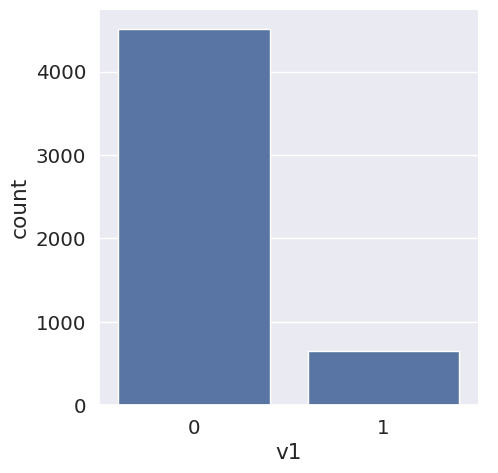

In [25]:
sns.catplot(x="v1",data=df,kind='count')

In [26]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class
df_majority = df[(df['v1']==0)]
df_minority = df[(df['v1']==1)]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples=4000 , # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_minority_upsampled, df_majority])

In [27]:
df.groupby(['v1']).count()

,v2
v1,
0,4516
1,4000


## Tokenization & Padding¶


## LSTM

In [28]:
import tensorflow as tf
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.30, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

# Create the model

model = Sequential()
model.add(Embedding(input_dim=5222, output_dim=128, input_length=500))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=6)

# Save the model
model.save('spam.h5')


Epoch 1/6
187/187 [==============================] - 65s 313ms/step - loss: 0.2301 - accuracy: 0.9069
Epoch 2/6
187/187 [==============================] - 60s 322ms/step - loss: 0.0381 - accuracy: 0.9893
Epoch 3/6
187/187 [==============================] - 57s 304ms/step - loss: 0.0144 - accuracy: 0.9965
Epoch 4/6
187/187 [==============================] - 58s 310ms/step - loss: 0.0099 - accuracy: 0.9983
Epoch 5/6
187/187 [==============================] - 58s 310ms/step - loss: 0.0098 - accuracy: 0.9983
Epoch 6/6
187/187 [==============================] - 75s 404ms/step - loss: 0.0082 - accuracy: 0.9987


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


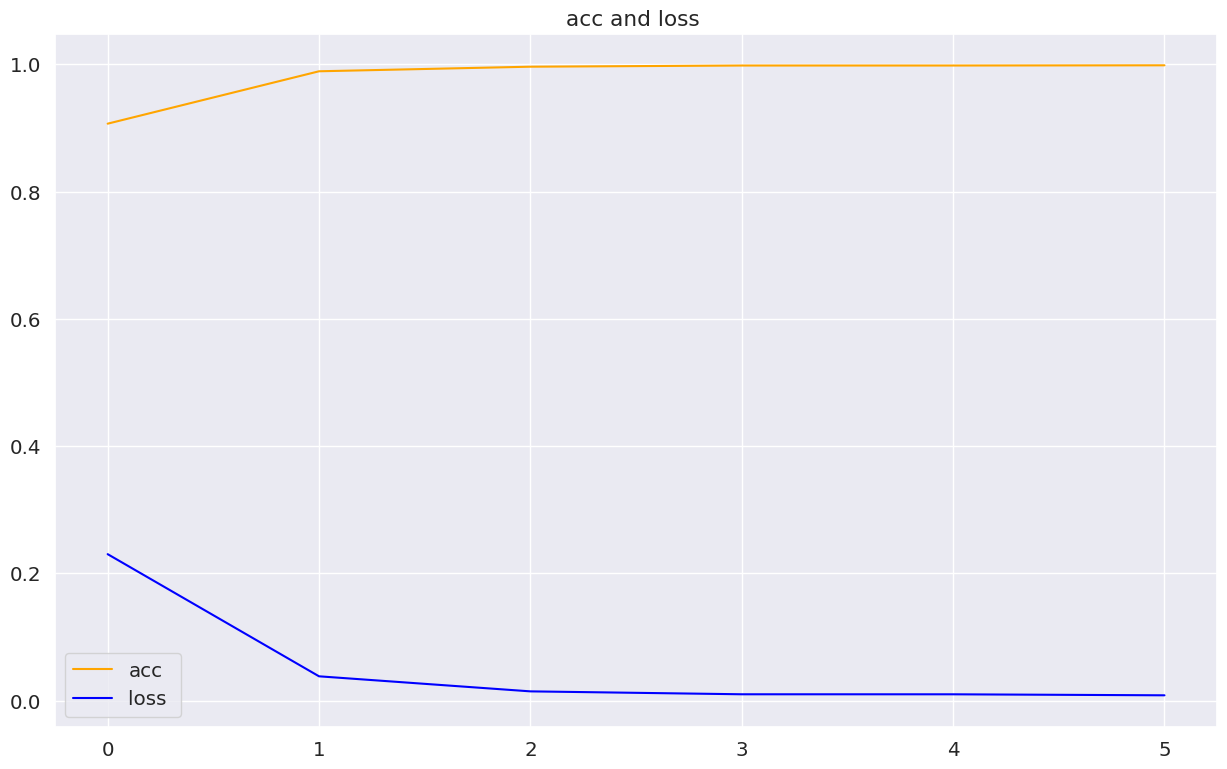

In [29]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='acc')
plt.plot(epochs, loss, '-', color='blue', label='loss ')
plt.title('acc and loss ')
plt.legend()
plt.show()

In [30]:
print("Model accuracy on the train set: ", model.evaluate(X_train, y_train)[1])
print("Model accuracy on the test set: ", model.evaluate(X_test, y_test)[1])

187/187 [==============================] - 13s 68ms/step - loss: 0.0067 - accuracy: 0.9988
Model accuracy on the train set:  0.99882572889328
80/80 [==============================] - 6s 77ms/step - loss: 0.0172 - accuracy: 0.9957
Model accuracy on the test set:  0.9956946969032288


In [31]:
predictions= model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)


80/80 [==============================] - 8s 98ms/step


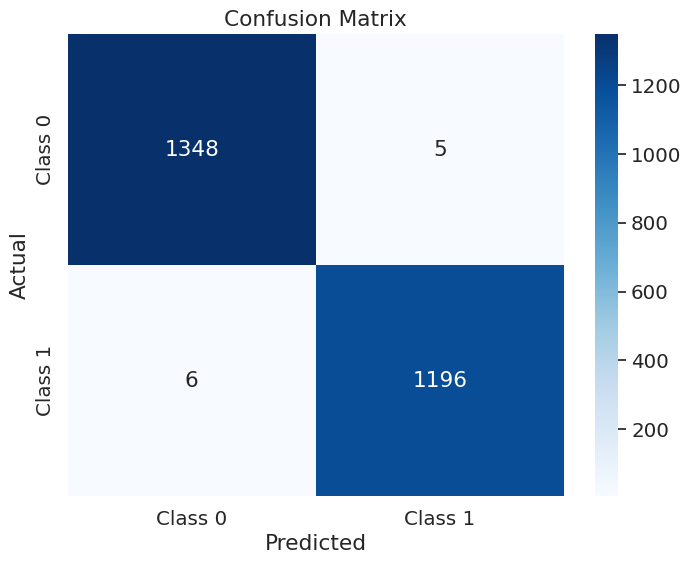

In [32]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,binary_predictions)
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [33]:


# Create a sample of text
text = "Congratulations! You've won a $1000 gift card. Click the link to claim your prize now"

# Tokenize the text
text = tokenizer.texts_to_sequences([text])

# Pad the sequence
text = pad_sequences(text, maxlen=500)

# Make a prediction
prediction = model.predict(text)
binary_predictions2 = (prediction> 0.5).astype(int)
# Print the prediction
print(binary_predictions2)




1/1 [==============================] - 0s 80ms/step
[[1]]


## RNN

In [34]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 5222
model2 = Sequential()
model2.add(Embedding(max_features, 64))
model2.add(SimpleRNN(64))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
187/187 [==============================] - 32s 157ms/step - loss: 0.3392 - acc: 0.8712
Epoch 2/10
187/187 [==============================] - 29s 157ms/step - loss: 0.6558 - acc: 0.7267
Epoch 3/10
187/187 [==============================] - 29s 156ms/step - loss: 0.2051 - acc: 0.9446
Epoch 4/10
187/187 [==============================] - 29s 157ms/step - loss: 0.1075 - acc: 0.9651
Epoch 5/10
187/187 [==============================] - 29s 158ms/step - loss: 0.0603 - acc: 0.9841
Epoch 6/10
187/187 [==============================] - 29s 156ms/step - loss: 0.0796 - acc: 0.9728
Epoch 7/10
187/187 [==============================] - 32s 171ms/step - loss: 0.0352 - acc: 0.9914
Epoch 8/10
187/187 [==============================] - 30s 159ms/step - loss: 0.0213 - acc: 0.9958
Epoch 9/10
187/187 [==============================] - 30s 159ms/step - loss: 0.0317 - acc: 0.9901
Epoch 10/10
187/187 [==============================] - 30s 161ms/step - loss: 0.0172 - acc: 0.9965


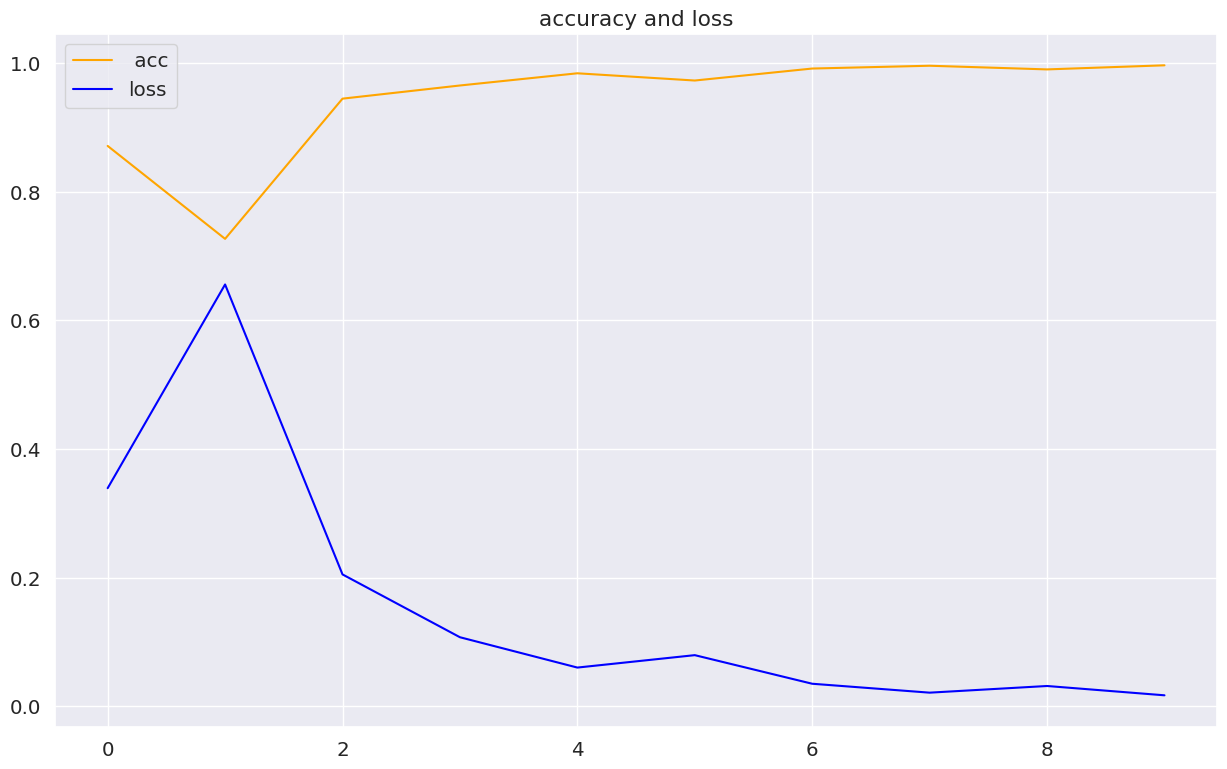

In [35]:
acc = history_rnn.history['acc']

loss = history_rnn.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label=' acc')
plt.plot(epochs, loss, '-', color='blue', label='loss')
plt.title('accuracy and loss')
plt.legend()
plt.show()


In [36]:
print("Model accuracy on the train set: ", model2.evaluate(X_train, y_train)[1])
print("Model accuracy on the test set: ", model2.evaluate(X_test, y_test)[1])

187/187 [==============================] - 7s 36ms/step - loss: 0.0153 - acc: 0.9968
Model accuracy on the train set:  0.996812641620636
80/80 [==============================] - 3s 38ms/step - loss: 0.0667 - acc: 0.9793
Model accuracy on the test set:  0.9792563319206238


In [37]:
predictions1= model2.predict(X_test)
binary_predictions1 = (predictions1 > 0.5).astype(int)

80/80 [==============================] - 3s 31ms/step


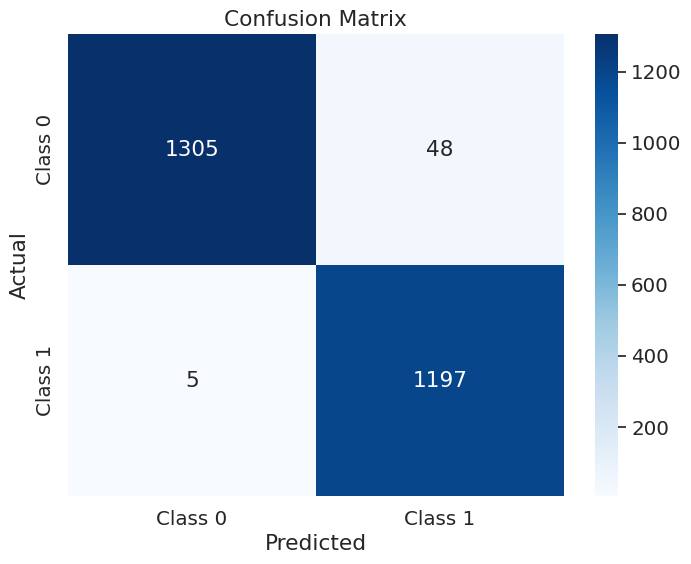

In [38]:
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,binary_predictions1)
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [39]:


# Create a sample of text
text1 = "Congratulations! You've won a $1000 gift card. Click the link to claim your prize now"
# Tokenize the text
text1 = tokenizer.texts_to_sequences([text1])

# Pad the sequence
text1 = pad_sequences(text1, maxlen=100)

# Make a prediction
prediction1 = model2.predict(text1)
binary_predictions = (prediction1> 0.5).astype(int)
# Print the prediction
print(binary_predictions)

1/1 [==============================] - 0s 190ms/step
[[1]]


## KNN

In [40]:
# Define the KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the hyperparameters to search
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9,10,12],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'p': [1, 2]  # Power parameter for the Minkowski distance metric
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Best Score: 0.9543712765179431


In [41]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')
knn.fit(X_train, y_train)
y_train_pred3 = knn.predict(X_train)
y_test_pred3 = knn.predict(X_test)
print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred3))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred3))

Accuracy Score on train data:  0.9989934574735783
Accuracy Score on test data:  0.9596868884540117


In [42]:
predictions4 = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1353
           1       0.92      1.00      0.96      1202

    accuracy                           0.96      2555
   macro avg       0.96      0.96      0.96      2555
weighted avg       0.96      0.96      0.96      2555



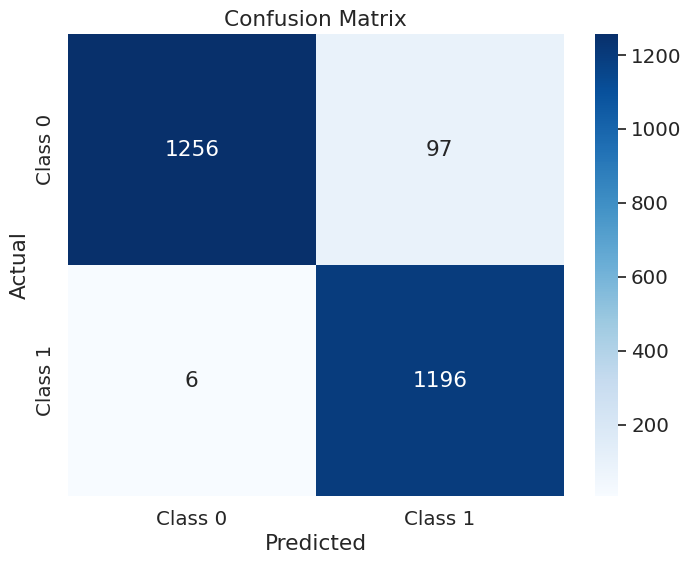

In [43]:
# Plot heatmap
plt.figure(figsize=(8, 6))
cm2= confusion_matrix(y_test,predictions4)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Create a sample of text
text1 ="Congratulations! You've won a $1000 gift card. Click the link to claim your prize now"

# Tokenize the text
text1 = tokenizer.texts_to_sequences([text1])

# Pad the sequence
text1 = pad_sequences(text1, maxlen=500)

# Make a prediction
prediction1 = knn.predict(text1)
# Print the prediction
print(binary_predictions)

[[1]]


In [45]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [46]:
predictions = naive_bayes.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.7800391389432485
Precision score:  0.8258655804480651
Recall score:  0.6747088186356073
F1 score:  0.7426739926739927


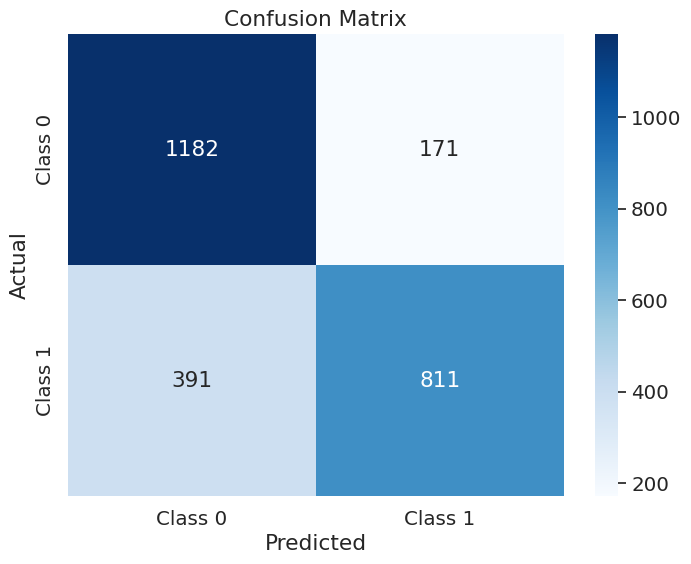

In [48]:
# Plot heatmap
plt.figure(figsize=(8, 6))
cm2= confusion_matrix(y_test,predictions)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
y_train_pred =naive_bayes .predict(X_train)
y_test_pred = naive_bayes.predict(X_test)
print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.762455963764469
Accuracy Score on test data:  0.7800391389432485


In [50]:


# Create a sample of text
text1 = "Congratulations! You've won a $1000 gift card. Click the link to claim your prize now"

# Tokenize the text
text1 = tokenizer.texts_to_sequences([text1])

# Pad the sequence
text1 = pad_sequences(text1, maxlen=500)

# Make a prediction
prediction1 = naive_bayes.predict(text1)
# Print the prediction
print(binary_predictions)

[[1]]
